<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(0_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n250.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,41.682178,92.710724,-1.157267,143.235635,143.759070,-0.523435
1,0.0,1.0,43.383090,60.843294,-0.152892,114.073492,113.832502,0.240990
2,0.0,2.0,81.360104,61.181725,-4.020512,148.521316,152.395545,-3.874229
3,0.0,3.0,24.470138,90.016010,0.397267,124.883415,123.758341,1.125074
4,0.0,4.0,41.305060,35.674357,-1.431145,85.548272,86.752523,-1.204251
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,97.705220,83.828849,-0.905581,190.628488,192.560965,-1.932477
29996,999.0,26.0,82.078592,96.912104,0.422778,189.413473,189.985282,-0.571809
29997,999.0,27.0,42.525714,48.504016,-1.979987,99.049743,100.631725,-1.581983
29998,999.0,28.0,65.148246,27.538845,0.148670,102.835761,102.303306,0.532455


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,41.682178,92.710724,-1.157267,143.235635,143.759070,-0.523435
1,0.0,1.0,43.383090,60.843294,-0.152892,114.073492,113.832502,0.240990
2,0.0,2.0,81.360104,61.181725,-4.020512,148.521316,152.395545,-3.874229
3,0.0,3.0,24.470138,90.016010,0.397267,124.883415,123.758341,1.125074
4,0.0,4.0,41.305060,35.674357,-1.431145,85.548272,86.752523,-1.204251
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,97.705220,83.828849,-0.905581,190.628488,192.560965,-1.932477
29996,999.0,26.0,82.078592,96.912104,0.422778,189.413473,189.985282,-0.571809
29997,999.0,27.0,42.525714,48.504016,-1.979987,99.049743,100.631725,-1.581983
29998,999.0,28.0,65.148246,27.538845,0.148670,102.835761,102.303306,0.532455


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    41.682178  92.710724 -1.157267  143.235635  143.759070 -0.523435
      1.0    43.383090  60.843294 -0.152892  114.073492  113.832502  0.240990
      2.0    81.360104  61.181725 -4.020512  148.521316  152.395545 -3.874229
      3.0    24.470138  90.016010  0.397267  124.883415  123.758341  1.125074
      4.0    41.305060  35.674357 -1.431145   85.548272   86.752523 -1.204251
...                ...        ...       ...         ...         ...       ...
999.0 25.0   97.705220  83.828849 -0.905581  190.628488  192.560965 -1.932477
      26.0   82.078592  96.912104  0.422778  189.413473  189.985282 -0.571809
      27.0   42.525714  48.504016 -1.979987   99.049743  100.631725 -1.581983
      28.0   65.148246  27.538845  0.148670  102.835761  102.303306  0.532455
      29.0   55.384503  52.090213 -0.204026  117.270690  117.334065 -0.063375

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    41.682178  92.710724 -1.157267  143.235635  143.759070 -0.523435
      1.0    43.383090  60.843294 -0.152892  114.073492  113.832502  0.240990
      2.0    81.360104  61.181725 -4.020512  148.521316  152.395545 -3.874229
      3.0    24.470138  90.016010  0.397267  124.883415  123.758341  1.125074
      4.0    41.305060  35.674357 -1.431145   85.548272   86.752523 -1.204251
...                ...        ...       ...         ...         ...       ...
999.0 25.0   97.705220  83.828849 -0.905581  190.628488  192.560965 -1.932477
      26.0   82.078592  96.912104  0.422778  189.413473  189.985282 -0.571809
      27.0   42.525714  48.504016 -1.979987   99.049743  100.631725 -1.581983
      28.0   65.148246  27.538845  0.148670  102.835761  102.303306  0.532455
      29.0   55.384503  52.090213 -0.204026  117.270690  117.334065 -0.063375

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,41.682178,92.710724,-1.157267,143.235635,143.759070,-0.523435
1,0.0,1.0,43.383090,60.843294,-0.152892,114.073492,113.832502,0.240990
2,0.0,2.0,81.360104,61.181725,-4.020512,148.521316,152.395545,-3.874229
3,0.0,3.0,24.470138,90.016010,0.397267,124.883415,123.758341,1.125074
4,0.0,4.0,41.305060,35.674357,-1.431145,85.548272,86.752523,-1.204251
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,97.705220,83.828849,-0.905581,190.628488,192.560965,-1.932477
29996,999.0,26.0,82.078592,96.912104,0.422778,189.413473,189.985282,-0.571809
29997,999.0,27.0,42.525714,48.504016,-1.979987,99.049743,100.631725,-1.581983
29998,999.0,28.0,65.148246,27.538845,0.148670,102.835761,102.303306,0.532455


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    41.682178  92.710724 -1.157267  143.235635  143.759070 -0.523435
      1.0    43.383090  60.843294 -0.152892  114.073492  113.832502  0.240990
      2.0    81.360104  61.181725 -4.020512  148.521316  152.395545 -3.874229
      3.0    24.470138  90.016010  0.397267  124.883415  123.758341  1.125074
      4.0    41.305060  35.674357 -1.431145   85.548272   86.752523 -1.204251
...                ...        ...       ...         ...         ...       ...
999.0 25.0   97.705220  83.828849 -0.905581  190.628488  192.560965 -1.932477
      26.0   82.078592  96.912104  0.422778  189.413473  189.985282 -0.571809
      27.0   42.525714  48.504016 -1.979987   99.049743  100.631725 -1.581983
      28.0   65.148246  27.538845  0.148670  102.835761  102.303306  0.532455
      29.0   55.384503  52.090213 -0.204026  117.270690  117.334065 -0.063375

[30000 rows x 6 columns]

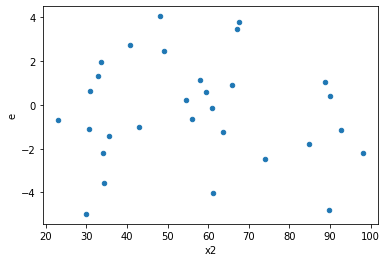

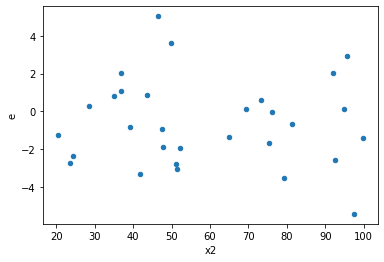

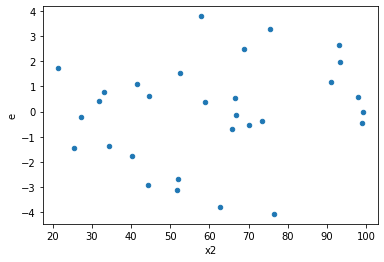

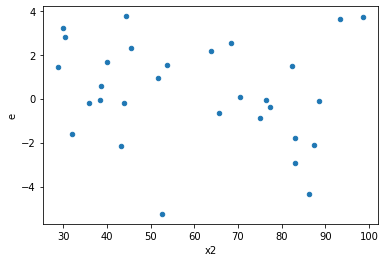

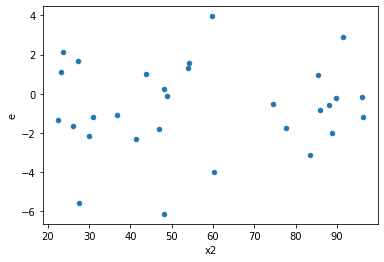

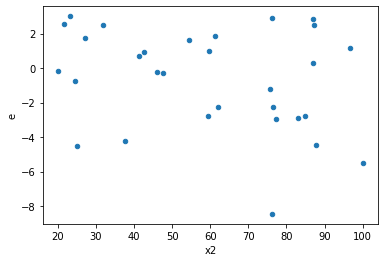

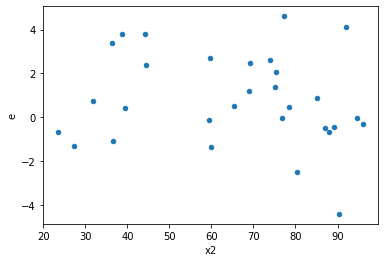

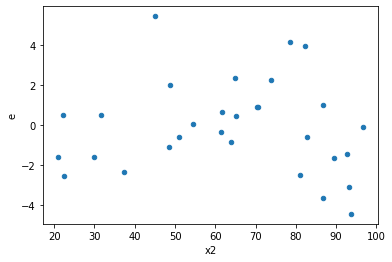

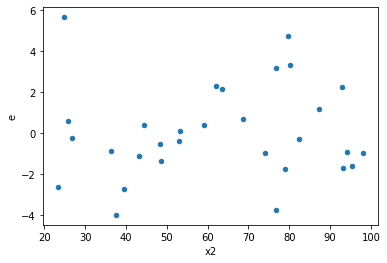

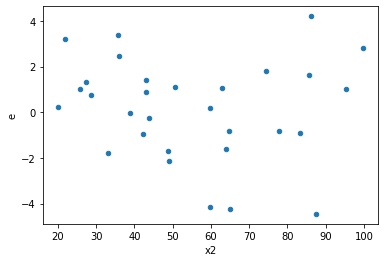

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,41.458956869037124,59.69557992613625,4.145895686903712,5.969557992613625,1.4398717293998977,0.5750038614775907,0.7124980692612046,0.2875019307387954,Reject001=1 : Homoscedasticity
3.0,10.0,10.0,24.840900036773228,47.405739988632014,2.4840900036773226,4.740573998863201,1.908374492005319,0.3229696995104603,0.8385151502447699,0.16148484975523014,Reject001=1 : Homoscedasticity
5.0,10.0,10.0,48.73727582682262,50.46041442313999,4.873727582682262,5.0460414423139985,1.0353556608793681,0.9572688560388776,0.5213655719805612,0.4786344280194388,Reject001=1 : Homoscedasticity
9.0,10.0,10.0,25.576712356251132,43.395509229141695,2.5576712356251132,4.339550922914169,1.696680504698858,0.41750964113658107,0.7912451794317095,0.20875482056829053,Reject001=1 : Homoscedasticity
10.0,10.0,10.0,34.494755320443026,69.17811232299047,3.4494755320443025,6.917811232299047,2.0054675465980956,0.2878317160561299,0.856084141971935,0.14391585802806495,Reject001=1 : Homoscedasticity
11.0,10.0,10.0,33.54219995721435,78.69758822638758,3.354219995721435,7.869758822638758,2.3462261964561772,0.19479733360941331,0.9026013331952933,0.09739866680470666,Reject001=1 : Homoscedasticity
13.0,10.0,10.0,19.815140695936734,67.6355054802717,1.9815140695936733,6.763550548027171,3.413324513721013,0.06579295567993104,0.9671035221600345,0.03289647783996552,Reject001=1 : Homoscedasticity
16.0,10.0,10.0,31.233945857653758,34.7270223165184,3.123394585765376,3.47270223165184,1.1118359004265441,0.870162902809902,0.564918548595049,0.435081451404951,Reject001=1 : Homoscedasticity
17.0,10.0,10.0,32.684822339976506,93.72105623754098,3.2684822339976507,9.372105623754099,2.8674182549528995,0.1118182861477024,0.9440908569261488,0.0559091430738512,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,41.458956869037124,59.69557992613625,4.145895686903712,5.969557992613625,1.4398717293998977,0.5750038614775907,Reject001=1 : Homoscedasticity
1.0,10.0,10.0,77.66145196420193,40.98607739289531,7.766145196420193,4.098607739289531,0.5277531691242118,0.3282467956698824,Reject001=1 : Homoscedasticity
2.0,10.0,10.0,57.75212940445923,34.80726429217126,5.775212940445924,3.480726429217126,0.6027009679314729,0.4372496481297217,Reject001=1 : Homoscedasticity
3.0,10.0,10.0,24.840900036773228,47.405739988632014,2.4840900036773226,4.740573998863201,1.908374492005319,0.3229696995104603,Reject001=1 : Homoscedasticity
4.0,10.0,10.0,48.16375975036553,36.506584329927655,4.816375975036553,3.6506584329927656,0.7579679102948478,0.669603250905897,Reject001=1 : Homoscedasticity
5.0,10.0,10.0,48.73727582682262,50.46041442313999,4.873727582682262,5.0460414423139985,1.0353556608793681,0.9572688560388776,Reject001=1 : Homoscedasticity
6.0,10.0,10.0,26.556754388536742,13.442040237196707,2.6556754388536743,1.3442040237196706,0.5061627652435939,0.29814182269352785,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,44.54084237104927,31.155768568280397,4.454084237104928,3.1155768568280395,0.6994876367343036,0.5824825670964262,Reject001=1 : Homoscedasticity
8.0,10.0,10.0,56.297790487822255,30.804329852578093,5.6297790487822255,3.080432985257809,0.5471676523298257,0.35590240887819846,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      981
Reject001=0 : Heteroscedasticity     19
Name: Result_test, dtype: int64